In [4]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import math
import geopandas as gpd
import csv

#import geoplot as gplt


from datetime import datetime
from pylab import *
from shapely.ops import nearest_points

In [5]:
df = pd.read_csv('clean_nyc_airbnb.csv')
df2 = pd.read_csv('clean_nyc_sale.csv')

In [6]:
#CALCULATE ANNUAL EARNING FROM AIRBNB
#assume the given occupnacy percentage
#assume: airbnb take 15%, maintainence 15% -> profit only 70%
df['annual_earn'] = df['price'] * 0.75 * df['occupancy_%']/100 * 365

In [7]:
#DETERMINE MEDIAN PRICE OF PROPERTY IN EACH NEIGHBOURHOOD GROUP

#split into neighbourhood_group

br_sale = df2.loc[df2["neighbourhood_group"] == 'Bronx']
bk_sale = df2.loc[df2["neighbourhood_group"] == 'Brooklyn']
mn_sale = df2.loc[df2["neighbourhood_group"] == 'Manhattan']
qn_sale = df2.loc[df2["neighbourhood_group"] == 'Queens']
si_sale = df2.loc[df2["neighbourhood_group"] == 'Staten Island']

br_med_cost = br_sale['sale_price'].median()
bk_med_cost = bk_sale['sale_price'].median()
mn_med_cost = mn_sale['sale_price'].median()
qn_med_cost = qn_sale['sale_price'].median()
si_med_cost = si_sale['sale_price'].median()

In [8]:
#DEFINE COST OR MORTGAGE RATE
#THIS WILL BE DETERMINED BASED ON SALE_PRICE
#i.e. total sale price will determine total mortgage

#Assuming fixed annual interest rate

def mortgage_calculator(p, i, n):
    
    '''
    The function calculate the periodic payment
    input: initial payment p, fixed annual interest rate i, total number of payment n
    output: perdioc payment amount
    Example:
        initial payment: p = 500,000
        fixed annual interest rate: i = 2.75
        30-year-loan with yearly payment: n = 30
    '''
    
    if i > 0: 
        A = p * i / ( 1 - ( 1 + i ) ** (-n) )
    elif i == 0:
        A = p / n
    else:
        print("print please input positive anual interest rate i")
    return A   

#assume current fixed annual interest rate for 30year loan
#assume median price per neighbourhood as initial cost
n = 30
i = 0.031

#add a mortgage column
# create a list of our conditions
conditions = [
    (df['neighbourhood_group'] == 'Brooklyn'),
    (df['neighbourhood_group'] == 'Bronx'),
    (df['neighbourhood_group'] == 'Manhattan'),
    (df['neighbourhood_group'] == 'Queens'),
    (df['neighbourhood_group'] == 'Staten Island')
    ]

# create a list of the values we want to assign for each condition
values = [mortgage_calculator(bk_med_cost, i, n),
         mortgage_calculator(br_med_cost, i, n),
         mortgage_calculator(mn_med_cost, i, n),
         mortgage_calculator(qn_med_cost, i, n),
         mortgage_calculator(si_med_cost, i, n)]

# create a new column and use np.select to assign values to it using our lists as arguments
df['annual_mortgage'] = np.select(conditions, values)

In [9]:
#divide into types of houses
shared_room = df.loc[df['room_type'] == 'Shared room']
apt = df.loc[df['room_type'] == 'Entire home/apt']
private_room = df.loc[df['room_type'] == 'Private room']

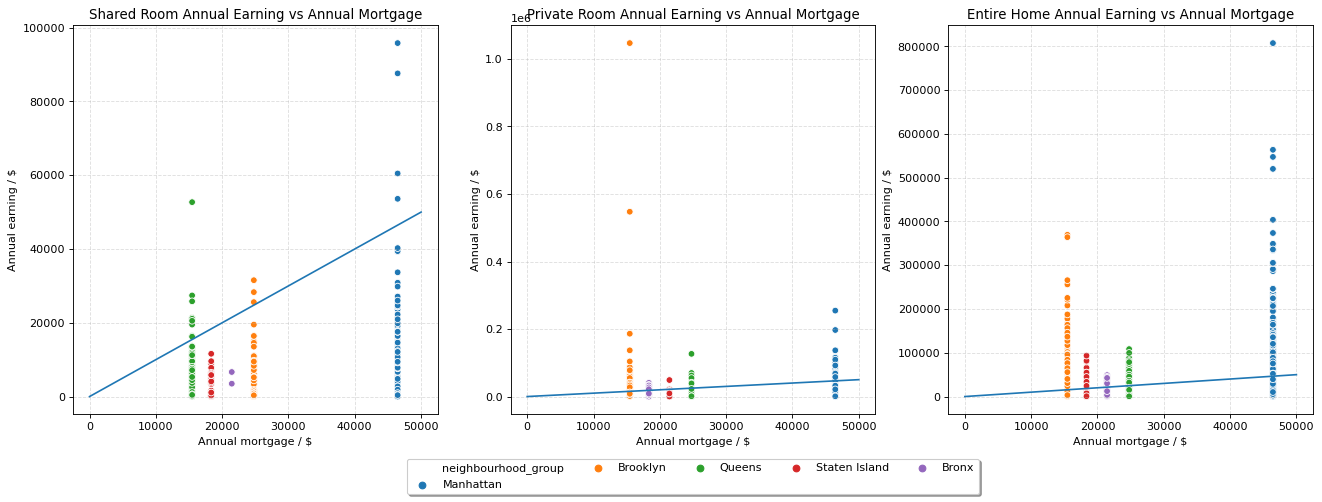

In [16]:
#PLOT ANNUAL MORTGAGE VS ANNUAL EARN


fig = plt.figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')
fig.subplots_adjust(top=0.8)

x = np.arange(50000)
y=x

### SHARED ROOM
ax1 = fig.add_subplot(131)
ax1 = sns.scatterplot(shared_room.annual_mortgage, shared_room.annual_earn, hue = shared_room.neighbourhood_group)
ax1.get_legend().remove()

plt.plot(x,y)
plt.title('Shared Room Annual Earning vs Annual Mortgage')
plt.ylabel('Annual earning / $')
plt.xlabel('Annual mortgage / $')
plt.grid(alpha=.4,linestyle='--')

box = ax1.get_position()
ax1.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])


### PRIVATE ROOM
ax2 = fig.add_subplot(132)
ax2 = sns.scatterplot(private_room.annual_mortgage, private_room.annual_earn, hue = private_room.neighbourhood_group)

plt.plot(x,y)

plt.title('Private Room Annual Earning vs Annual Mortgage')
plt.ylabel('Annual earning / $')
plt.xlabel('Annual mortgage / $')
plt.grid(alpha=.4,linestyle='--')

# Shrink current axis's height by 10% on the bottom
box = ax2.get_position()
ax2.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)


### ENTIRE HOME
ax3 = fig.add_subplot(133)
ax3 = sns.scatterplot(apt.annual_mortgage, apt.annual_earn, hue = apt.neighbourhood_group)
ax3.get_legend().remove()

plt.plot(x,y)
plt.title('Entire Home Annual Earning vs Annual Mortgage')
plt.ylabel('Annual earning / $')
plt.xlabel('Annual mortgage / $')
plt.grid(alpha=.4,linestyle='--')

box = ax3.get_position()
ax3.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

plt.show()

In [ ]:
# plot location in relation to Neighbourhood group 
title = 'Neighbourhood Group Location'
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude,data.latitude,hue=data.neighbourhood_group).set_title(title)
plt.ioff()

In [ ]:
sns.set(style="white", palette="muted", color_codes=True)

title = ""
sns.catplot(x='neighbourhood_group', kind="count", hue="room_type", data=df)
